In [1]:
hd_dir = "/home/hpc/cudahub/tracer/hybriddomain/"
modelFileName = 'problems/trigonometric_test'
conn_name = "dglconnection"
device_conf_name = "dgllogisticdevices"

In [2]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
if hd_dir not in sys.path:
    sys.path.insert(0, hd_dir)
env_dir = os.path.join(hd_dir, 'spaces', 'math_space', "common")
if env_dir not in sys.path:
    sys.path.insert(0, env_dir)
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from envs.hs.model.model_main import ModelNet as Model
from settings.settings_main import Settings

In [3]:
model = Model()
model.io.loadFromFile(modelFileName)
settings = Settings(model, conn_name, device_conf_name, conn_name, pf_prefix=currentdir)

INFO:block_main.block_io:DefaultBound not set
INFO:settings_main:device_conf_name
INFO:settings_main:dgllogisticdevices


Please enter password for user hpc:
········


In [4]:
#block0 = model.blocks[0]
#equation = model.equations[0]
#model.paramValues

In [5]:
from solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook
progress = ProgressNotebook(100, prefix='solving')
from solvers.hs.remoterun.remoterun import remoteProjectRun

clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))
def run(event):
    remoteProjectRun(settings, 1, progress)
bTest.on_click(run)
display(progress.progress)
display(bTest)

IntProgress(value=0, description='solving: ', max=99)

Button(description='run trigonometric_test ', style=ButtonStyle())

INFO:remoterun:project_path
INFO:remoterun:trigonometric_test
INFO:remoterun:project_name
INFO:remoterun:trigonometric_test
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (publickey) successful!
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings alredy exist
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings/paths exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/hpc/Tracer/dglprojects/settings/device_conf exists...
INFO:remoterun:folder /home/hpc/Tracer/dglprojects/settings/device_conf alredy exist
INFO:remoterun:set

### Results:

In [6]:
import numpy as np
import re
import matplotlib.pyplot as plt
from ipywidgets import interactive

out_dir = os.path.join(currentdir,  modelFileName, "out")
listdir = os.listdir(out_dir)

print(listdir)

#outs = [os.path.join(out_dir, file_name)
#        for file_name in listdir
#        if '.out' in file_name]
#print(outs)
#with open(outs[0]) as f:
#    data = f.read()

['trigonometric_test-res0-V.out', '.ipynb_checkpoints', 'trigonometric_test-plot0.mp4', 'trigonometric_test-res0-U.out']


In [7]:
#Эта функция выбирает из какого фаула вытаскивать данные в папке out

def vibor(i):
    outs = [os.path.join(out_dir, file_name)
        for file_name in listdir
        if '.out' in file_name]
    with open(outs[i]) as f:
        data = f.read()
    lines = data.split('\n')
    result = {}

    for line in lines:
        if ':' in line:
            key, val = line.split(':')
            result[key]=val[1:]
        else:
            val = line
            result[key] += val  
    return key, val, result

In [8]:

#lines = data.split('\n')
#result = {}

#for line in lines:
#    if ':' in line:
#        key, val = line.split(':')
#        result[key]=val[1:]
#    else:
#        val = line
 #       result[key] += val
        

In [9]:

def gen(reuslt):
    for key in reuslt:
        step_0 = re.subn(r'\.\s+',".0,",result[key])[0]
        step_1 = re.subn(r'\s+',",",step_0)[0]
        step_2 = step_1.replace('.]','.0]')
        step_3 = step_2.replace('[,','[')

        yield((key, eval(step_3)))

In [10]:

key, val, result = vibor(0)
result_t = dict([(float(key), val) for key, val in gen(result)])
#print(result_t)
time = [key for key in result_t]
result_x = np.array([result_t[key] for key in result_t]).T


#это если система из более чем одного уравнения выбирается строка результата
key, val, result = vibor(1)
result_t = dict([(float(key), val) for key, val in gen(result)])
result_y = np.array([result_t[key] for key in result_t]).T
#print (result_x)
#print(len(result_x[0]))
#print (result_x)
#print (result_y)

##### U(x, t-fixed):

In [11]:
%matplotlib inline
def f(t):
    plt.plot(result_t[time[t]])
w = interactive(f,t=(0,100,1))
display(w)

interactive(children=(IntSlider(value=50, description='t'), Output()), _dom_classes=('widget-interact',))

##### U(x-fixed, t):

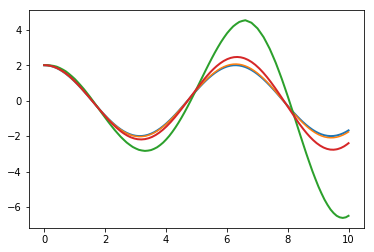

In [15]:
%matplotlib inline

#from pylab import *
import math
#def f(x):   
#    tt = np.linspace(0,10,10000)
#    yy = ddeint(model, g, tt, fargs=(k, h, r)) # K=0.1, d=5, r=1
#    yy = [math.cos(poi) for poi in tt]
#    plt.plot(tt, yy, lw=2)
#    plt.plot(time, result_x[x])
#w = interactive(f,x=(0,150,1))
#display(w)


#k = 2
#h = 1
#r = 1
#model = lambda Y,t, k,h,r :  r * (k - ( Y(t-h))) * Y(t)
#g = lambda t: 1.0 # history before t=0
#tt = np.linspace(0,10,10000)
#yy = ddeint(model, g, tt, fargs=(k, h, r)) # K=0.1, d=5, r=1


radius = 2 
yy = [radius*math.cos(poi) for poi in time]
#синий действительное решение
plt.plot(time, yy, lw=2)
#оранджевый это отрисовка описанным методом
plt.plot(time, result_y[10])

def model(Y,t,d):
    x,y=Y(t)
    return np.array([y,-1*x])

g=lambda t : np.array ([2,0])
#tt =linspace (0,100,20000)
for d in [0,0.2]:
    yy1 = ddeint (model,g,time,fargs=(d,))
#зеленое это то что рисует библиотечный метод по time
plt.plot(time,yy1[:,0],lw=2)

#количество точек для использования построения решения
tt =np.linspace (0.0,10.0,1000)

for d in [0,0.2]:
    yy2 = ddeint (model,g,tt,fargs=(d,))
#красное это то что рисует библиотечный метод по своей сетке tt
plt.plot(tt,yy2[:,0],lw=2)

plt.show()
#print(len(time)," ",len(yy))
#print(len(tt))
#print(abs(yy[15]))
#print(result_x[10])
#print(tt)
#print(time)

In [13]:
"""
This module implements ddeint, a simple Differential Delay Equation
solver built on top of Scipy's odeint """

# REQUIRES Numpy and Scipy.
import numpy as np
import scipy.integrate
import scipy.interpolate


class ddeVar:
    """
    The instances of this class are special function-like
    variables which store their past values in an interpolator and
    can be called for any past time: Y(t), Y(t-d).
    Very convenient for the integration of DDEs.
    """

    def __init__(self, g, tc=0):
        """ g(t) = expression of Y(t) for t<tc """

        self.g = g
        self.tc = tc
        # We must fill the interpolator with 2 points minimum
        self.itpr = scipy.interpolate.interp1d(
            np.array([tc - 1, tc]),  # X
            np.array([self.g(tc), self.g(tc)]).T,  # Y
            kind='linear', bounds_error=False,
            fill_value=self.g(tc))

    def update(self, t, Y):
        """ Add one new (ti,yi) to the interpolator """

        self.itpr.x = np.hstack([self.itpr.x, [t]])
        Y2 = Y if (Y.size == 1) else np.array([Y]).T
        self.itpr.y = np.hstack([self.itpr.y, Y2])
        self.itpr.fill_value = Y
        self.itpr._y = self.itpr._reshape_yi(self.itpr.y)

    def __call__(self, t=0):
        """ Y(t) will return the instance's value at time t """

        return (self.g(t) if (t <= self.tc) else self.itpr(t))


class dde(scipy.integrate.ode):
    """
    This class overwrites a few functions of ``scipy.integrate.ode``
    to allow for updates of the pseudo-variable Y between each
    integration step.
    """

    def __init__(self, f, jac=None):
        def f2(t, y, args):
            return f(self.Y, t, *args)

        scipy.integrate.ode.__init__(self, f2, jac)
        self.set_f_params(None)

    def integrate(self, t, step=0, relax=0):
        scipy.integrate.ode.integrate(self, t, step, relax)
        self.Y.update(self.t, self.y)
        return self.y

    def set_initial_value(self, Y):
        self.Y = Y  # !!! Y will be modified during integration
        scipy.integrate.ode.set_initial_value(self, Y(Y.tc), Y.tc)


def ddeint(func, g, tt, fargs=None):
    """ Solves Delay Differential Equations
    Similar to scipy.integrate.odeint. Solves a Delay differential
    Equation system (DDE) defined by
        Y(t) = g(t) for t<0
        Y'(t) = func(Y,t) for t>= 0
    Where func can involve past values of Y, like Y(t-d).

    Parameters
    -----------

    func
      a function Y,t,args -> Y'(t), where args is optional.
      The variable Y is an instance of class ddeVar, which means that
      it is called like a function: Y(t), Y(t-d), etc. Y(t) returns
      either a number or a numpy array (for multivariate systems).
    g
      The 'history function'. A function g(t)=Y(t) for t<0, g(t)
      returns either a number or a numpy array (for multivariate
      systems).

    tt
      The vector of times [t0, t1, ...] at which the system must
      be solved.
    fargs
      Additional arguments to be passed to parameter ``func``, if any.
    Examples
    ---------

    We will solve the delayed Lotka-Volterra system defined as

        For t < 0:
        x(t) = 1+t
        y(t) = 2-t

        For t >= 0:
        dx/dt =  0.5* ( 1- y(t-d) )
        dy/dt = -0.5* ( 1- x(t-d) )

    The delay ``d`` is a tunable parameter of the model.
    >>> import numpy as np
    >>> from ddeint import ddeint
    >>>
    >>> def model(XY,t,d):
    >>>     x, y = XY(t)
    >>>     xd, yd = XY(t-d)
    >>>     return np.array([0.5*x*(1-yd), -0.5*y*(1-xd)])
    >>>
    >>> g = lambda t : np.array([1+t,2-t]) # 'history' at t<0
    >>> tt = np.linspace(0,30,20000) # times for integration
    >>> d = 0.5 # set parameter d
    >>> yy = ddeint(model,g,tt,fargs=(d,)) # solve the DDE !

    """

    dde_ = dde(func)
    dde_.set_initial_value(ddeVar(g, tt[0]))
    dde_.set_f_params(fargs if fargs else [])
    results = [dde_.integrate(dde_.t + dt) for dt in np.diff(tt)]
    return np.array([g(tt[0])] + results)

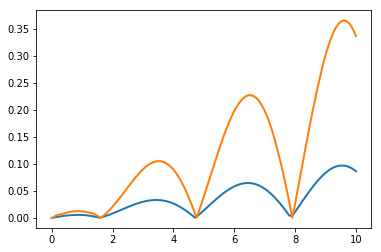

In [17]:
#Здесь разность между теоретическим решением cos(t), решением трейсера и решение модуля метода ddeint
%matplotlib inline

#from pylab import *
import math




#функция ddeint 
def model(Y,t,d):
    x,y=Y(t)
    return np.array([y,-1*x])
#начальные условия
g=lambda t : np.array ([1,0])
for d in [0,0.2]:
    yy1 = ddeint (model,g,time,fargs=(d,))
#количество точек для использования построения решения
tt =np.linspace (0.0,10.0,1000)
#список значений в узлах
for d in [0,0.2]:
    yy2 = ddeint (model,g,tt,fargs=(d,))




#синия линия решение которое дает нам трейсер отклонение от действительного решений
i = 0
g1=[]
for poi in time:
    g1.append( abs(2*math.cos(poi)-result_y[10][i]))
    i+=1
plt.plot(time, g1, lw=2)

#оранджевая линия то что дает модуль ddeint отклонение от действительного решений
z1= yy2[:,0]    
i = 0
fd = []
for poi in tt:
    b = abs(z1[i]-math.cos(poi))
    fd.append(b)
    i+=1
plt.plot(tt, fd, lw=2)

plt.show()


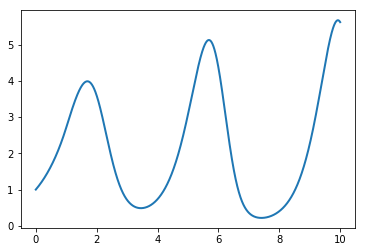

In [18]:
#Уравнение Хатчинсона 
import matplotlib.pyplot as plt
import numpy as np

#from ddeint import ddeint

k = 2
h = 1
r = 1

model = lambda Y,t, k,h,r :  r * (k - ( Y(t-h))) * Y(t)
g = lambda t: 1 # history before t=0

tt = np.linspace(0,10,10000)
yy = ddeint(model, g, tt, fargs=(k, h, r)) # K=0.1, d=5, r=1

plt.plot(tt, yy, lw=2)
plt.show()

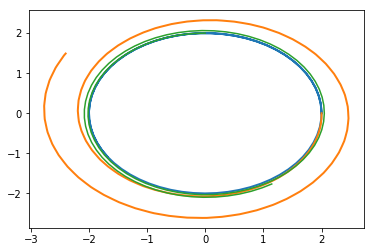

In [18]:
#Здесь должен рисоваться фазовый портрет 
%matplotlib inline

#from pylab import *
import math


#Синия линия: Теоретическое решение при заданном радиусе 

xx = [radius*math.cos(poi) for poi in time]
yy = [radius*math.sin(poi) for poi in time]
plt.plot(xx, yy, lw=2)






#Оранджевая линия: то что рисует модуль  ddeint при заданных начальных условиях
#функция ddeint 
def model(Y,t,d):
    x,y=Y(t)
    return np.array([y,-1*x])
#начальные условия
g=lambda t : np.array ([radius,0])

#количество точек для использования построения решения
tt =np.linspace (0.0,10.0,1000)
#список значений в узлах
for d in [0,0.2]:
    yy2 = ddeint (model,g,tt,fargs=(d,))

plt.plot(yy2[:,0], yy2[:,1], lw=2)

#Зеленая линия: то что рисует трейсер
plt.plot(result_x[10], result_y[10])













plt.show()
